In [ ]:
import pandas as pd
from google.colab import drive
df=pd.read_excel('loan3(na).xlsx')

In [ ]:
df.head()

,loan,Industry_type,Company_type,Beginning_time,Collateral,Bank_relationship,Capital_increase,Age,Education,Credit
0,1.0,1,1.0,4,4,1,4,3,2,2
1,1.0,2,1.0,2,3,2,3,4,3,2
2,1.0,1,1.0,3,3,1,4,3,4,1
3,1.0,2,1.0,4,1,1,4,3,4,2
4,1.0,1,1.0,3,1,1,3,2,3,2


In [ ]:
df1=df.dropna()
X=df1[['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit']]
y=df1['loan'] 
from sklearn.model_selection import train_test_split #區分訓練集與測試集
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

# **一、隨機森林(Random Forest)：分類器**

In [ ]:
df1=df.dropna()
X=df1[['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit']]
y=df1['loan'] 
from sklearn.model_selection import train_test_split #區分訓練集與測試集
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

In [ ]:
#使用隨機森林進行機器學習模型
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要最高使用多少棵樹,max_features='log2'表每棵樹最大特徵數為max_features=log2(n_features)，默認為max_features='sqrt'
RF = RandomForestClassifier(n_estimators=100,max_features="sqrt",oob_score=True,random_state=3)

#從訓練組資料中建立隨機森林模型
RF.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=3)

In [ ]:
#列出各特徵重要程度
print('特徵重要程度: ',RF.feature_importances_)
print('oob score: ',RF.oob_score_)

特徵重要程度:  [0.07735577 0.05578645 0.14335839 0.08122831 0.08180382 0.16793042
 0.11013135 0.2824055 ]
oob score:  0.8404907975460123


In [ ]:
#評估隨機森林訓練集預測結果的精準度、召回率、F1
RF_pred= RF.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,RF_pred))
print("======================================================\n")
print(classification_report(y_train,RF_pred))

[[123   1]
 [  4  35]]

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       124
         2.0       0.97      0.90      0.93        39

    accuracy                           0.97       163
   macro avg       0.97      0.94      0.96       163
weighted avg       0.97      0.97      0.97       163



In [ ]:
#評估隨機森林測試集預測結果的精準度、召回率、F1
RF_pred= RF.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,RF_pred))
print("======================================================\n")
print(classification_report(y_test,RF_pred))

[[27  1]
 [ 5  8]]

              precision    recall  f1-score   support

         1.0       0.84      0.96      0.90        28
         2.0       0.89      0.62      0.73        13

    accuracy                           0.85        41
   macro avg       0.87      0.79      0.81        41
weighted avg       0.86      0.85      0.85        41



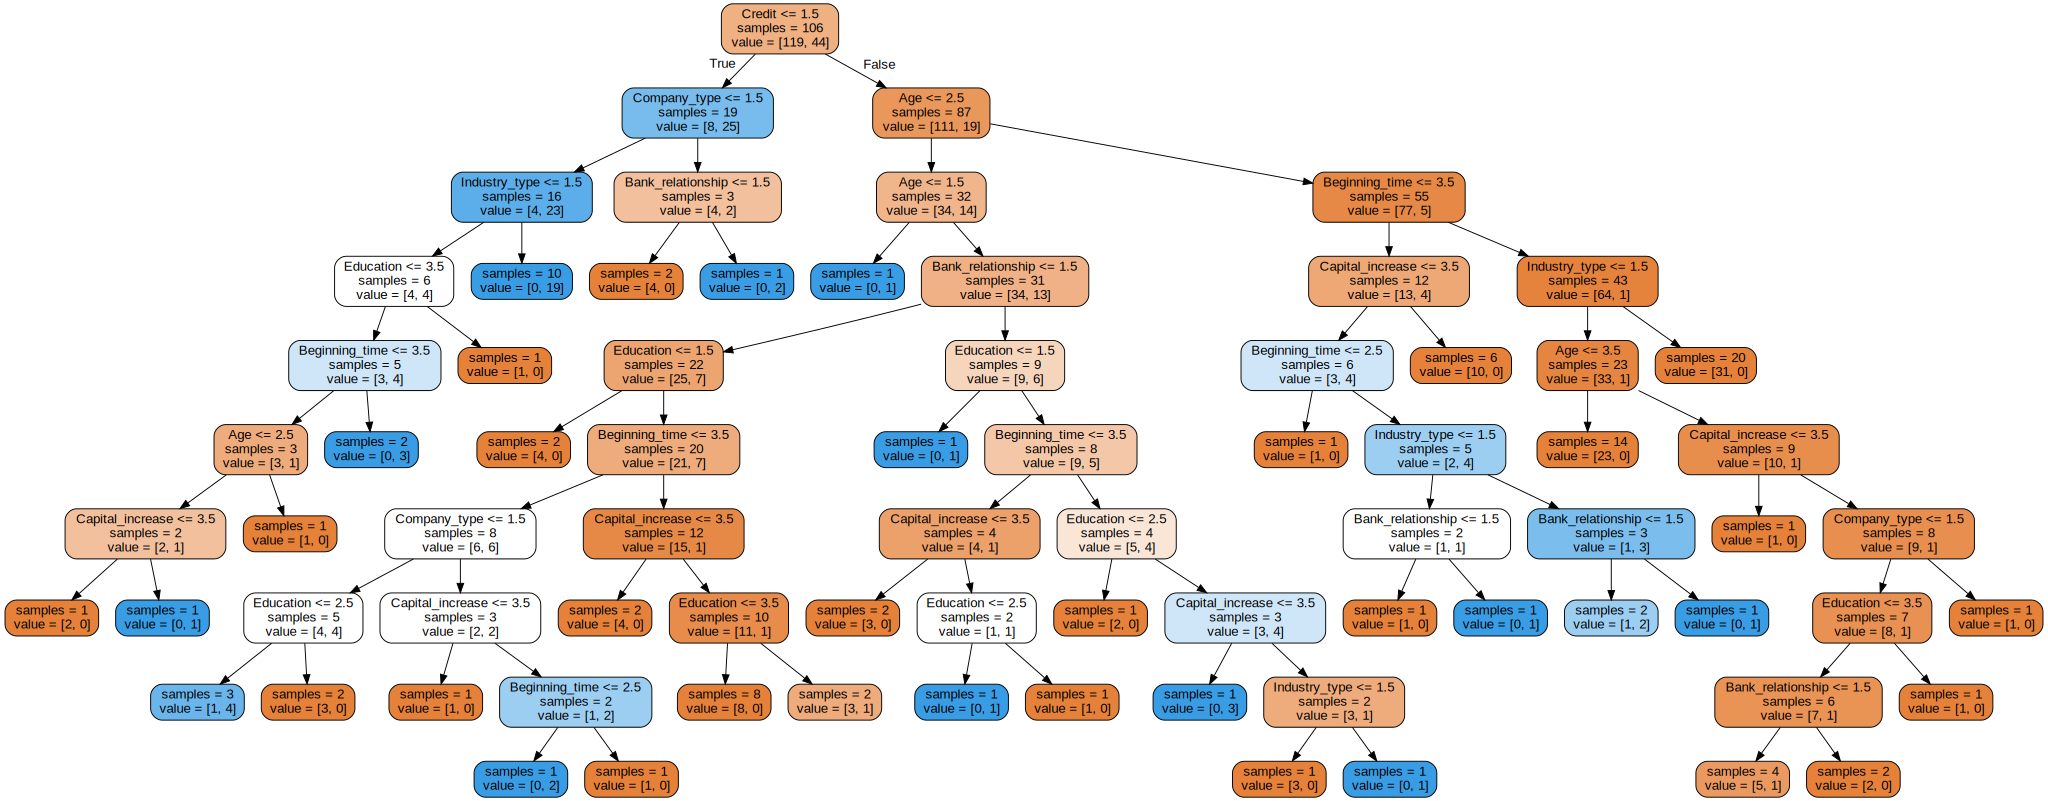

In [ ]:
# 將分析結果以視覺化圖形呈現(僅可取其中一棵樹繪圖)
from sklearn import tree #導入決策樹模組
import graphviz #導入可視化模組
dot_df = \
    tree.export_graphviz(
            RF.estimators_[30], 
            out_file = None,
            feature_names=['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit'],
            filled = True,
            impurity = False,
            rounded = True)

graph=graphviz.Source(dot_df) #將分析結果以graphviz圖檔呈現
graph
#graph.render("loan4") #下載唯讀圖檔

# **二、隨機森林(Random Forest)：量的預測(迴歸器)**

In [ ]:
data=pd.read_excel('2019STA.xlsx')

In [ ]:
data.head()

,Department,Grade,Gender,Quiz,Mid_Exam,Final_Exam
0,BA,一A,M,81,72.0,80
1,BA,一A,M,80,87.5,90
2,BA,一A,M,69,74.0,76
3,BA,一A,F,58,52.0,50
4,BA,一A,M,82,76.0,78


In [ ]:
X=data[['Mid_Exam']]
y=data['Final_Exam'] 
from sklearn.model_selection import train_test_split #區分訓練集與測試集
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型, n_estimators=100表取100棵樹，max_features='log2'表每棵樹最大特徵數為max_features=log2(n_features)，默認為max_features='sqrt'
RF2 = RandomForestRegressor(n_estimators=100, max_features='log2',criterion = 'mse')
# 使用訓練資料訓練模型
RF2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_features='log2')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# 使用X_test預測y，得到y_pred1 
y_pred1 = RF2.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred1)) 
print("rmse: %.3f" % rmse) 

rmse: 5.740


In [ ]:
data['Final_Exam'].mean()

66.85964912280701

In [ ]:
RF2.score(X_test,y_test)

0.8802105099843841

# 練習
請以salary.xlsx檔案資料的工作年資、教育年資與性別等特徵建立隨機森林預測模式，預測年所得。(迴歸器：量的預測)，分析後請畫出決策樹，並說明模式之判定準則。



# 作業(隨機森林)：
(1)請利用boston_house(type).xlsx檔案中的指標，以隨機森林來預測boston house的房價高低(Price Type)，分析後請說明隨機森林之主要判定準則及預測準確度。

(2)請利用boston_house(type).xlsx檔案中的指標，以隨機森林來預測boston house的房價(Price)，分析後請說明隨機森林之主要判定準則及預測準確度。

註： 1.資料與預測指標說明如附檔。 2.Price Type:1表單位房價低於20，2表單位房價高於20。